In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [101]:
earthquake_data = pd.read_csv("data/earthquakes.csv")

In [115]:
volcanos_data = pd.read_csv("data/volcanos.csv")

In [102]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]]

In [103]:
magnitude_distribution = earthquake_data.Magnitude
magnitude_distribution

0        6.0
1        5.8
2        6.2
3        5.8
4        5.8
5        6.7
6        5.9
7        6.0
8        6.0
9        5.8
10       5.9
11       8.2
12       5.5
13       5.6
14       6.0
15       6.1
16       8.7
17       6.0
18       5.7
19       5.8
20       5.9
21       5.9
22       5.7
23       5.7
24       5.7
25       5.6
26       7.3
27       6.5
28       5.6
29       6.4
        ... 
23382    5.5
23383    6.0
23384    5.5
23385    5.5
23386    7.9
23387    5.6
23388    6.3
23389    5.9
23390    5.5
23391    5.9
23392    6.2
23393    5.5
23394    6.4
23395    6.4
23396    5.6
23397    6.0
23398    5.5
23399    6.7
23400    5.9
23401    6.0
23402    5.8
23403    7.6
23404    5.6
23405    5.6
23406    5.6
23407    5.6
23408    5.5
23409    5.9
23410    6.3
23411    5.5
Name: Magnitude, Length: 23412, dtype: float64

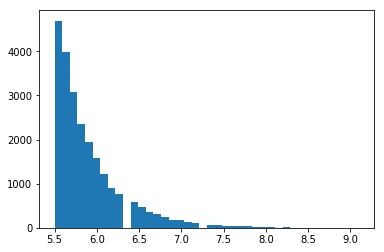

In [104]:
plt.hist(magnitude_distribution, bins = 40)
plt.show()

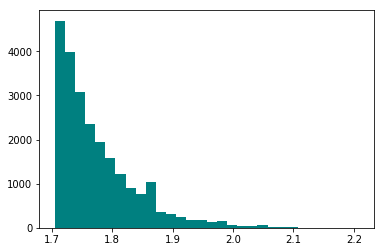

In [105]:
plt.hist(np.log(magnitude_distribution), bins = 30, color = "teal")
plt.show()

In [106]:
maximum = earthquake_data.Magnitude.max()
earthquake_data[earthquake_data.Magnitude == maximum]

,Date,Time,Latitude,Longitude,Magnitude,Depth
17083,12/26/2004,00:58:53,3.295,95.982,9.1,30.0
20501,03/11/2011,05:46:24,38.297,142.373,9.1,29.0


In [107]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)
earthquake_data.drop(["Date", "Time"], axis=1, inplace=True)

In [108]:
earthquake_data.head()

,Latitude,Longitude,Magnitude,Depth,DateTime
0,19.246,145.616,6.0,131.6,1965-01-02 13:44:18
1,1.863,127.352,5.8,80.0,1965-01-04 11:29:49
2,-20.579,-173.972,6.2,20.0,1965-01-05 18:05:58
3,-59.076,-23.557,5.8,15.0,1965-01-08 18:49:43
4,11.938,126.427,5.8,15.0,1965-01-09 13:32:50


In [109]:
last_forth = earthquake_data.DateTime.nlargest(4).values[3]
earthquake_data[earthquake_data.DateTime > last_forth]

,Latitude,Longitude,Magnitude,Depth,DateTime
23409,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19
23411,37.3973,141.4103,5.5,11.94,2016-12-30 20:08:28


In [110]:
# m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 85, llcrnrlon = -170, urcrnrlon = 190)
# m.drawcoastlines()
# m.fillcontinents(color = "yellow", lake_color = "teal")
# m.drawparallels(np.arange(-90, 91, 15))
# m.drawmeridians(np.arange(-180, 181, 15))
# m.drawmapboundary(fill_color = "teal")
# plt.show()

C:\Users\Obache\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Obache\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


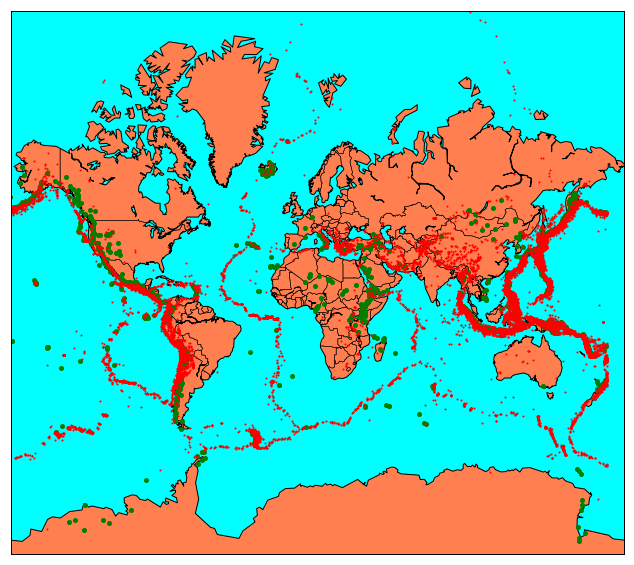

In [117]:
plt.figure(figsize= (15, 10))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 85, llcrnrlon = -170, urcrnrlon = 190)
x_volc, y_volc = m(volcanos_data.Longitude.tolist(), volcanos_data.Latitude.tolist())
m.plot(x_volc, y_volc, "o", markersize = 4, color = "green")

x, y = m(earthquake_data.Longitude.tolist(), earthquake_data.Latitude.tolist())
m.plot(x, y, "o", markersize = 1, color = "red")
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
m.drawcountries()
plt.show()
